In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import warnings

# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
#  Step 1: Get the page
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/amazon_data_webpage.html"
data = requests.get(url).text
soup = BeautifulSoup(data, "html5lib")

In [3]:
#  Step 2: Extract title
page_title = soup.title.text
print("The content of <title>:", page_title)

The content of <title>: Amazon.com, Inc. (AMZN) Stock Historical Prices & Data - Yahoo Finance


In [4]:
#  Step 3: Scrape table rows into DataFrame
rows = []
for row in soup.find("tbody").find_all("tr"):
    col = row.find_all("td")
    rows.append({
        "Date": col[0].text,
        "Open": col[1].text,
        "High": col[2].text,
        "Low": col[3].text,
        "Close*": col[4].text,
        "Adj Close**": col[5].text,
        "Volume": col[6].text
    })

amazon_data = pd.DataFrame(rows)

In [5]:
#  Step 4: Clean numeric columns
for col in ["Open", "High", "Low", "Close*", "Adj Close**", "Volume"]:
    amazon_data[col] = amazon_data[col].str.replace(",", "").astype(float)

In [6]:
#  Step 5: Save to CSV
amazon_data.to_csv("amazon_stock_data.csv", index=False)
print("\n Data saved to amazon_stock_data.csv")


 Data saved to amazon_stock_data.csv


In [7]:
#  Step 6: Quick EDA
print("\n Basic Statistics:")
print(amazon_data.describe())

print("\n First 5 Rows:")
print(amazon_data.head())

print("\n Last 5 Rows:")
print(amazon_data.tail())


 Basic Statistics:
              Open         High          Low       Close*  Adj Close**  \
count    61.000000    61.000000    61.000000    61.000000    61.000000   
mean   1562.770820  1681.560000  1473.012787  1601.442787  1601.442787   
std     766.109539   834.921861   716.778385   781.127778   781.127778   
min     556.290000   581.800000   474.000000   552.520000   552.520000   
25%     888.000000   949.590000   884.490000   924.990000   924.990000   
50%    1623.530000  1736.410000  1460.930000  1629.620000  1629.620000   
75%    1906.490000  2025.570000  1776.020000  1893.630000  1893.630000   
max    3489.580000  3552.250000  3086.000000  3450.960000  3450.960000   

             Volume  
count  6.100000e+01  
mean   9.234556e+07  
std    2.834466e+07  
min    5.000040e+07  
25%    7.353970e+07  
50%    8.333410e+07  
75%    1.008322e+08  
max    1.832208e+08  

 First 5 Rows:
           Date     Open     High      Low   Close*  Adj Close**       Volume
0  Jan 01, 2021  3270

In [8]:
# Example Analysis
print("\n Highest closing price:", amazon_data["Close*"].max())
print(" Lowest closing price:", amazon_data["Close*"].min())
print(" Average volume traded:", amazon_data["Volume"].mean())


 Highest closing price: 3450.96
 Lowest closing price: 552.52
 Average volume traded: 92345557.37704918


In [9]:
df = pd.read_csv("amazon_stock_data.csv")

In [10]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")

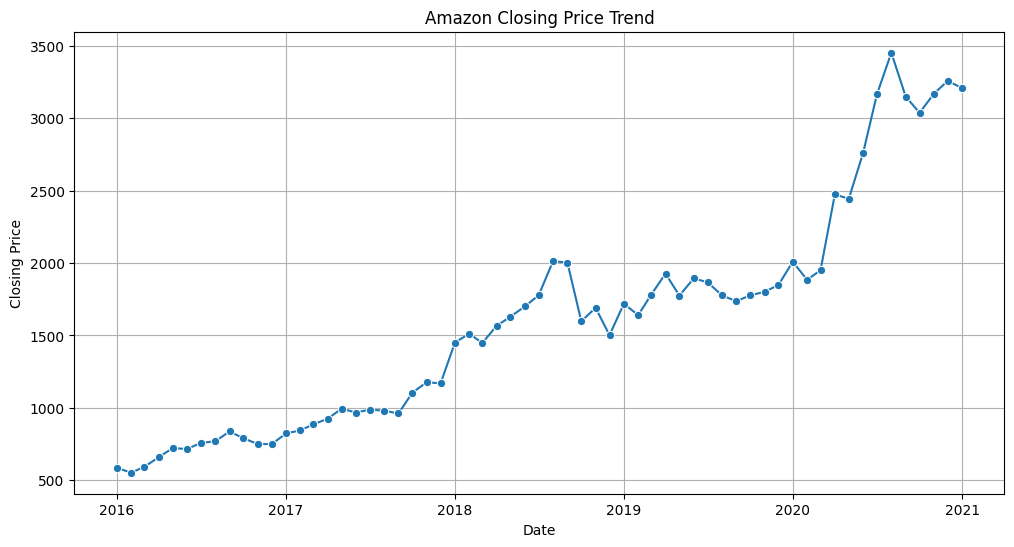

In [11]:
# Line chart for closing price trend
plt.figure(figsize=(12,6))
sns.lineplot(x="Date", y="Close*", data=df, marker="o")
plt.title("Amazon Closing Price Trend")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

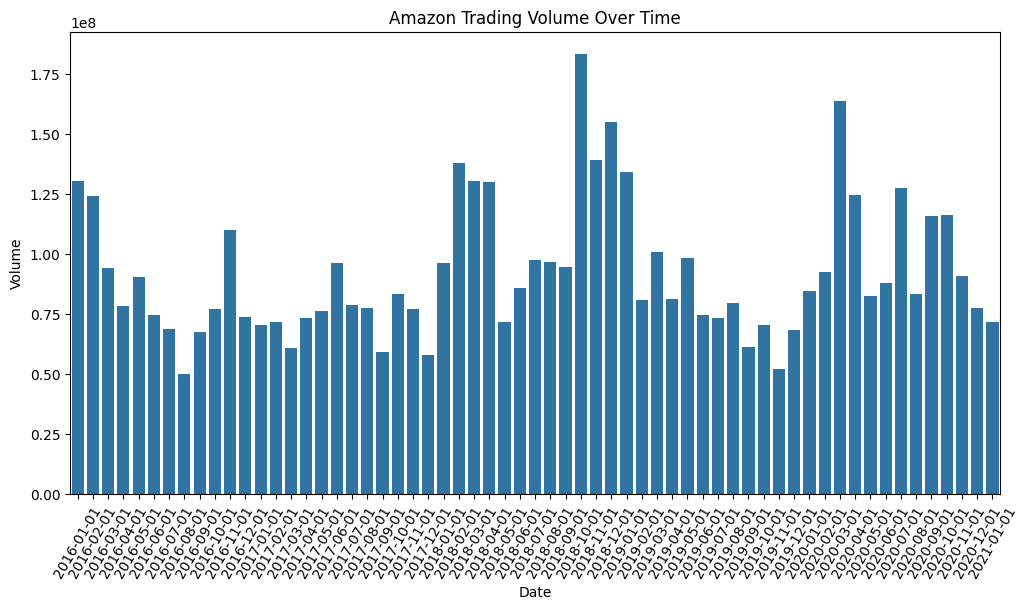

In [12]:
# Trading Volume trend
plt.figure(figsize=(12,6))
sns.barplot(x="Date", y="Volume", data=df)
plt.title("Amazon Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.xticks(rotation=60)
plt.show()